<a href="https://colab.research.google.com/github/Aamit02/Handwriting-Recognition-Using-CNN/blob/main/Handwritten_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import gzip
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io

In [40]:
def load_mnist_images(filename, num_images):
    with gzip.open(filename, 'rb') as f:
        buffer = f.read(16)
        image_size = 28
        buf = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, image_size, image_size, 1)
    return data

In [41]:
def load_mnist_labels(filename, num_labels):
    with gzip.open(filename, 'rb') as f:
        buffer = f.read(8)
        buf = f.read(num_labels)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels



In [59]:
def preprocess_image(image_path):

    image = io.imread(image_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    coords = np.column_stack(np.where(thresholded > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return deskewed

In [60]:
def segment_layout(image):

    h, w = image.shape[:2]
    top_half = image[:h//2, :]
    bottom_half = image[h//2:, :]

    return top_half, bottom_half

In [61]:
num_train_images = 10000
x_train = load_mnist_images('train-images-idx3-ubyte.gz', num_images=num_train_images)
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz', num_labels=num_train_images)

In [62]:
x_train = x_train / 255.0
y_train = LabelBinarizer().fit_transform(y_train)

In [63]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [64]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [65]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
250/250 [==============================] - 5s 17ms/step - loss: 0.5486 - accuracy: 0.8311 - val_loss: 0.1782 - val_accuracy: 0.9490
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1447 - accuracy: 0.9563 - val_loss: 0.1122 - val_accuracy: 0.9690
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0991 - accuracy: 0.9707 - val_loss: 0.0774 - val_accuracy: 0.9780
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0637 - accuracy: 0.9799 - val_loss: 0.0968 - val_accuracy: 0.9700
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0794 - val_accuracy: 0.9790
Epoch 6/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0434 - accuracy: 0.9855 - val_loss: 0.0818 - val_accuracy: 0.9780
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0593 - val_accuracy: 0.9830

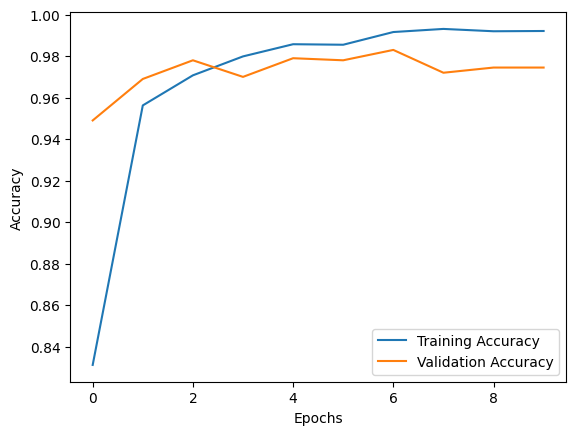

In [66]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


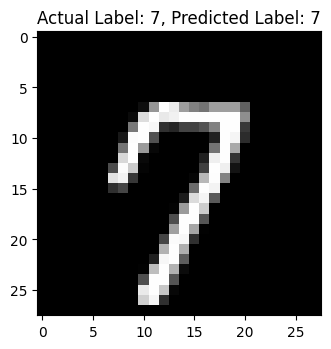

In [72]:
from random import randint
index = randint(0, x_val.shape[0] - 1)
sample_image = x_val[index].reshape(28, 28)
sample_image_for_prediction = sample_image.reshape(1, 28, 28, 1)
predicted_label = np.argmax(model.predict(sample_image_for_prediction))
plt.subplot(1, 2, 2)
plt.imshow(sample_image, cmap='gray')
plt.title(f'Actual Label: {np.argmax(y_val[index])}, Predicted Label: {predicted_label}')

plt.tight_layout()
plt.show()

In [75]:
from tensorflow.keras.layers import Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/20
250/250 [==============================] - 6s 19ms/step - loss: 1.0317 - accuracy: 0.6496 - val_loss: 0.2135 - val_accuracy: 0.9415 - lr: 0.0010
Epoch 2/20
250/250 [==============================] - 5s 21ms/step - loss: 0.3611 - accuracy: 0.8894 - val_loss: 0.1309 - val_accuracy: 0.9645 - lr: 9.0484e-04
Epoch 3/20
250/250 [==============================] - 4s 17ms/step - loss: 0.2590 - accuracy: 0.9191 - val_loss: 0.1002 - val_accuracy: 0.9715 - lr: 8.1873e-04
Epoch 4/20
250/250 [==============================] - 5s 19ms/step - loss: 0.2021 - accuracy: 0.9436 - val_loss: 0.0911 - val_accuracy: 0.9770 - lr: 7.4082e-04
Epoch 5/20
250/250 [==============================] - 5s 19ms/step - loss: 0.1764 - accuracy: 0.9505 - val_loss: 0.0686 - val_accuracy: 0.9795 - lr: 6.7032e-04
Epoch 6/20
250/250 [==============================] - 6s 25ms/step - loss: 0.1399 - accuracy: 0.9590 - val_loss: 0.0709 - val_accuracy: 0.9810 - lr: 6.0653e-04
Epoch 7/20
250/250 [========================

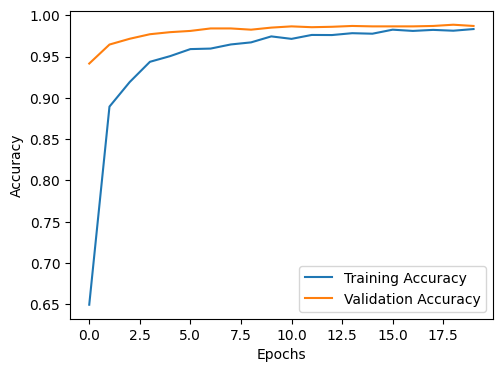

In [76]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 * np.exp(-epoch / 10.0)

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[LearningRateScheduler(lr_schedule)])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


63/63 [==============================] - 0s 5ms/step


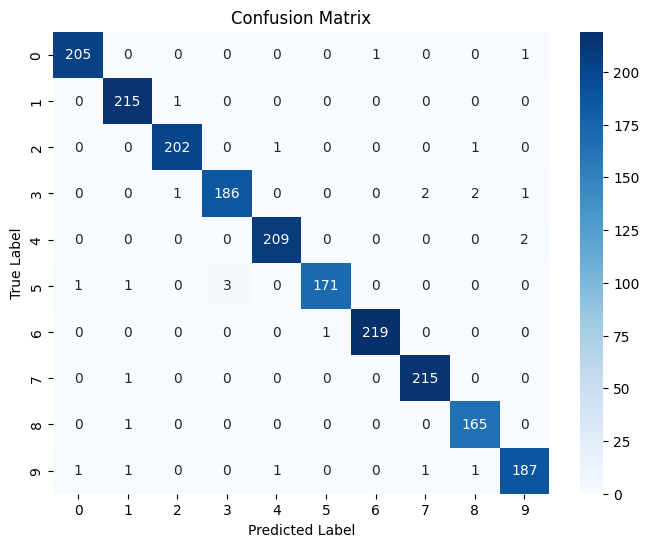

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       207
           1       0.98      1.00      0.99       216
           2       0.99      0.99      0.99       204
           3       0.98      0.97      0.98       192
           4       0.99      0.99      0.99       211
           5       0.99      0.97      0.98       176
           6       1.00      1.00      1.00       220
           7       0.99      1.00      0.99       216
           8       0.98      0.99      0.99       166
           9       0.98      0.97      0.98       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [82]:
y_val_pred = model.predict(x_val)
y_val_true = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)
cm = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_val_true, y_val_pred))


In [83]:
num_test_images = 10000
x_test = load_mnist_images('t10k-images-idx3-ubyte.gz', num_images=num_test_images)
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz', num_labels=num_test_images)
x_test = x_test / 255.0
y_test = LabelBinarizer().fit_transform(y_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.0461 - accuracy: 0.9861
Test Accuracy: 0.9861000180244446


The misclassified images
63/63 [==============================] - 0s 5ms/step


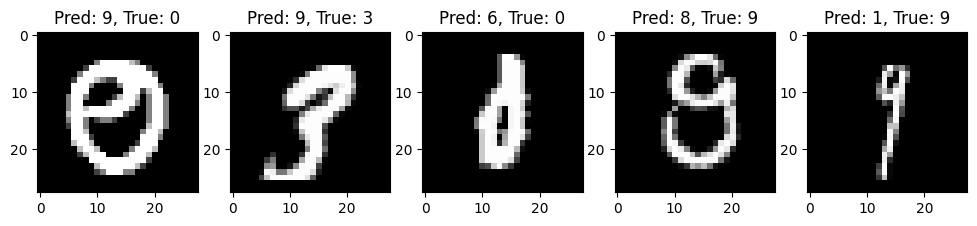

In [89]:
print("The misclassified images")
y_val_pred = np.argmax(model.predict(x_val), axis=1)
misclassified_indices = np.where(y_val_pred != np.argmax(y_val, axis=1))[0]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    index = misclassified_indices[i]
    plt.imshow(x_val[index][:, :, 0], cmap='gray')
    plt.title(f'Pred: {y_val_pred[index]}, True: {np.argmax(y_val[index])}')
plt.show()


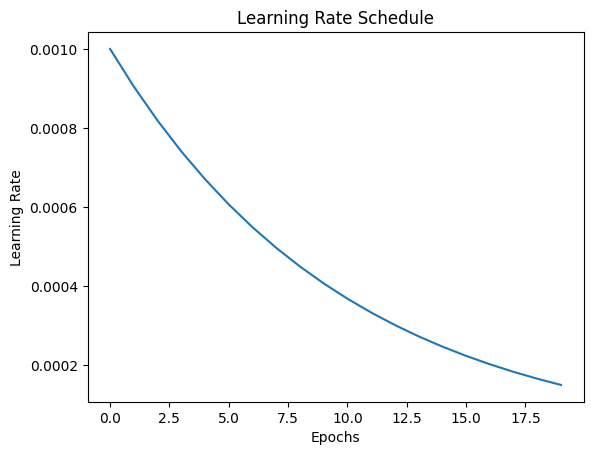

In [93]:
plt.plot([lr_schedule(epoch) for epoch in range(20)])
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()
